In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Importing dataset
'''
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
response = requests.get(url)

with open('dataset.csv', 'wb') as file:
    file.write(response.content)

    '''

df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df.population.median()

1166.0

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

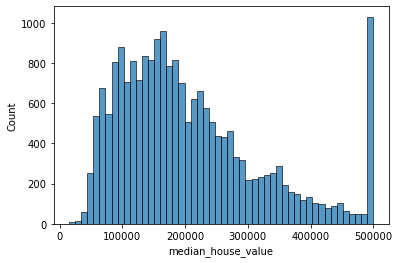

In [7]:
sns.histplot(df.median_house_value, bins =50)

In [8]:
#filter where ocean proximity is <1H OCEAN or INLAND
condition = (df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')
filtered_df = df[condition]
filtered_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
filtered_df.population.median()

1195.0

In [10]:
#seperating the filtered dataset into train, validation and test

n = len(filtered_df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [12]:
#rearranging the index

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [13]:
#spliting the dataset into train, validation and test
filtered_df = filtered_df.copy()

df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_train + n_val]]
df_test = filtered_df.iloc[idx[n_train + n_val:]]

In [14]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0,INLAND
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0,INLAND
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0,<1H OCEAN
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0,INLAND
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0,<1H OCEAN


In [15]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [16]:
# reset the index of the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0,INLAND
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0,INLAND
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0,<1H OCEAN
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0,INLAND
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0,<1H OCEAN
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0,INLAND
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0,INLAND
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0,<1H OCEAN


In [18]:
# convert the median_house_value to logarithm for even distribution

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [19]:
# delete the price from the dataset

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [20]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,INLAND
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,INLAND
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,<1H OCEAN
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,INLAND
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080,<1H OCEAN
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,INLAND
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546,INLAND
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526,<1H OCEAN


In [21]:
df_train.ocean_proximity.unique()

array(['INLAND', '<1H OCEAN'], dtype=object)

### Building the regression model

In [22]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [23]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]

In [24]:
X_train = df_train[base].values
X_train

array([[-1.1914e+02,  3.6230e+01,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [-1.1779e+02,  3.4120e+01,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [-1.1797e+02,  3.3680e+01,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [-1.1808e+02,  3.4130e+01,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [-1.1846e+02,  3.4290e+01,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [-1.1841e+02,  3.4000e+01,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [25]:
y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

##### Filling with 0

In [26]:
def train_linear_regession (X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [27]:
def prepare_X(df):
    df = df.copy()
    
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [28]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
# Train the datatset
X_train = prepare_X(df_train)
w0, w = train_linear_regession(X_train, y_train)

#Validate the dataset
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

#### Filling with mean

In [30]:
def prepare_X_avg(df):
    df = df.copy()
    
    df_num = df[base].copy()  # Create a copy of the selected columns
    
    # Calculate the mean for each column in the 'base' list
    mean_values = df_num.mean()
    
    # Fill missing values with their respective column means
    df_num.fillna(mean_values, inplace=True)
    
    X = df_num.values
    return X


In [31]:
# Train the datatset
X_train = prepare_X_avg(df_train)
w0, w = train_linear_regession(X_train, y_train)

#Validate the dataset
X_val = prepare_X_avg(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.34

#### Using regularisation

In [32]:
#create a function to train the input

def train_linear_regession_reg (X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [33]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    # Train the datatset
    X_train = prepare_X(df_train)
    w0, w = train_linear_regession_reg(X_train, y_train, r=r)

    #Validate the dataset
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print (r, w0, round(score, 2))

0 -9.763249477769088 0.34
1e-06 -9.763228830871164 0.34
0.0001 -9.761185236073864 0.34
0.001 -9.742646249816385 0.34
0.01 -9.561056193388234 0.34
0.1 -8.058889769606484 0.34
1 -3.133154278461814 0.34
5 -0.841086797513227 0.35
10 -0.4381172315678242 0.35


In [34]:
filtered_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### Using various values of seed

In [62]:
seed_range = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for i in seed_range:
#rearranging the index

    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    idx

    #spliting the dataset into train, validation and test
    filtered_df = filtered_df.copy()

    df_train = filtered_df.iloc[idx[:n_train]]
    df_val = filtered_df.iloc[idx[n_train:n_train + n_val]]
    df_test = filtered_df.iloc[idx[n_train + n_val:]]

    # reset the index of the dataset
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # convert the median_house_value to logarithm for even distribution
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # delete the price from the dataset

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = df_train[base].values

    # Train the datatset
    X_train = prepare_X(df_train)
    w0, w = train_linear_regession(X_train, y_train)

    #Validate the dataset
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    values_of_seeds = (np.round(score, 2))
    # Append the score to the scores list
    scores.append(values_of_seeds)
    print(values_of_seeds)

# Print the scores list containing all the scores
print("Scores:", scores)

# Calculate the standard deviation of the scores
std_dev = np.std(scores)

# Print the standard deviation
print("Standard Deviation of Scores:", std_dev)
    
        

    

    

0.34
0.34
0.34
0.33
0.34
0.34
0.34
0.35
0.35
0.33
Scores: [0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]
Standard Deviation of Scores: 0.006324555320336747


#### USing Test dataframe

In [63]:
filtered_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [65]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
idx

#spliting the dataset into train, validation and test
filtered_df = filtered_df.copy()

df_train = filtered_df.iloc[idx[:n_train]]
df_val = filtered_df.iloc[idx[n_train:n_train + n_val]]
df_test = filtered_df.iloc[idx[n_train + n_val:]]

# reset the index of the dataset
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# convert the median_house_value to logarithm for even distribution
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

# delete the price from the dataset

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full = pd.concat([df_train, df_val])
df_full = df_full.reset_index(drop=True)


In [67]:

y_full_train = np.concatenate([y_train, y_val])

# Train the datatset
X_full_train = prepare_X(df_full)
w0, w = train_linear_regession_reg(X_full_train, y_full_train,r=0.001)

#Validate the dataset
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(score)

0.33389598652364255
